# Hands-on Activity 3.1 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [ ]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [ ]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [ ]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [ ]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [ ]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [ ]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

6. Create a method to define DFS technique

In [ ]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [ ]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print(destination, ' could not be reached from ', source)

9. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current DFS path: Boston
Current DFS path: Boston->Providence
Already visited Boston
Current DFS path: Boston->Providence->New York
Current DFS path: Boston->Providence->New York->Chicago
Current DFS path: Boston->Providence->New York->Chicago->Denver
Current DFS path: Boston->Providence->New York->Chicago->Denver->Phoenix
Already visited New York
Current DFS path: Boston->New York
Current DFS path: Boston->New York->Chicago
Current DFS path: Boston->New York->Chicago->Denver
Current DFS path: Boston->New York->Chicago->Denver->Phoenix
Already visited New York
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes

In DFS, note that it explores as far as possible along a branch before backtracking. That is why it used a recursive approach. It is initialized by adding the start node to the path list. It will return the path if the start node is equal to the end node. DFS focuses on recursion.

To start,

10. Create a method to define BFS technique

In [ ]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

11. Define a shortestPath method to return the shortest path from source to destination using BFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

12. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


#### Question:
    
Describe the BFS method to compute for the shortest path using the given sample codestion:
    


The BFS method implements the Breadth-First Search algorithm to discover the shortest path from a starting node to a target node in a directed graph. It utilizes a queue fo path exploration. The method returns the shortest path as a list of nodes or None if no path is found. The optional toPrint flag allows printing of intermediate steps during the traversal.

#### Supplementary Activitiy
* Use a specific location or city to solve transportation using graph
* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

# Implementation of DFS and BFS in finding shortest paths in flights using 6 countries.


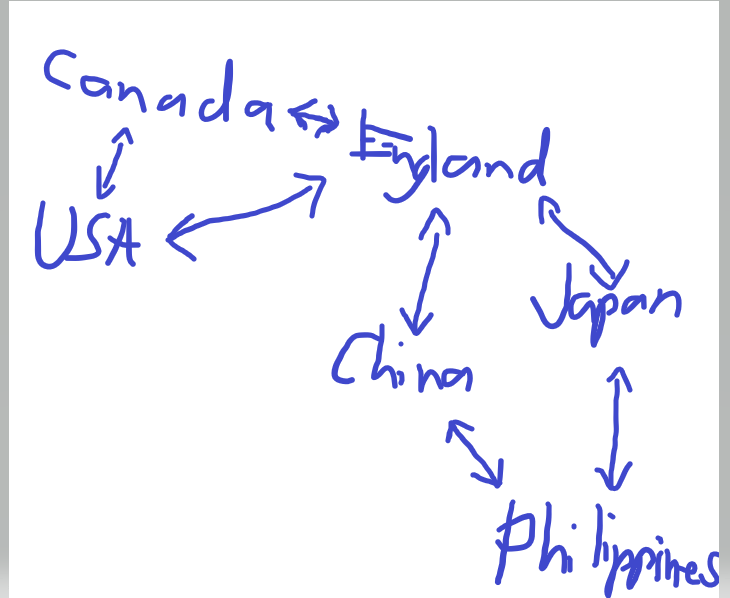

In [ ]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Canada', 'USA', 'England', 'China', 'Japan', 'Philippines'):
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Canada'), g.getNode('USA')))
    g.addEdge(Edge(g.getNode('Canada'), g.getNode('England')))
    g.addEdge(Edge(g.getNode('USA'), g.getNode('Canada')))
    g.addEdge(Edge(g.getNode('USA'), g.getNode('England')))
    g.addEdge(Edge(g.getNode('England'), g.getNode('Canada')))
    g.addEdge(Edge(g.getNode('England'), g.getNode('USA')))
    g.addEdge(Edge(g.getNode('England'), g.getNode('China')))
    g.addEdge(Edge(g.getNode('England'), g.getNode('Japan')))
    g.addEdge(Edge(g.getNode('China'), g.getNode('England')))
    g.addEdge(Edge(g.getNode('Japan'), g.getNode('England')))
    g.addEdge(Edge(g.getNode('China'), g.getNode('Philippines')))
    g.addEdge(Edge(g.getNode('Japan'), g.getNode('Philippines')))
    g.addEdge(Edge(g.getNode('Philippines'), g.getNode('China')))
    g.addEdge(Edge(g.getNode('Philippines'), g.getNode('Japan')))
    return g

In [ ]:
def DFS(graph, start, end, path, shortest, toPrint=False):
    """Assumes graph is a Digraph; current and end are nodes
       Returns a shortest path from current to end in graph"""
    path = path + [start]

    if toPrint:
        print(printPath(path))

    # check if the current node is the end node
    if start == end:
        return path
    # explore each child node of the current node
    for node in graph.childrenOf(start):
        # check if the node has not been visited to avoid cycles
        if node not in path:
            # recursively call DFS with the child node as the new current
            newPath = DFS(graph, node, end, path, shortest, toPrint)

            # update shortest path if a new shorter path is found
            if newPath is not None and (shortest is None or len(newPath) < len(shortest)):
                shortest = newPath

    # return shortest path found during the DFS
    return shortest


In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

In [ ]:
testSP('Canada', 'Japan')

Canada
Canada->USA
Canada->USA->England
Canada->USA->England->China
Canada->USA->England->China->Philippines
Canada->USA->England->China->Philippines->Japan
Canada->USA->England->Japan
Canada->England
Canada->England->USA
Canada->England->China
Canada->England->China->Philippines
Canada->England->China->Philippines->Japan
Canada->England->Japan
Shortest path from Canada to Japan is Canada->England->Japan


In [ ]:
# type your code here using BFS
def BFS(graph, start, end, toPrint=False):

    # initialize the path with the starting node
    initPath = [start]

    # initialize the queue with the initial path
    pathQueue = [initPath]

    # continue BFS traversal until the queue is empty
    while len(pathQueue) != 0:
        # get and remove the leftmost element in pathQueue
        tmpPath = pathQueue.pop(0)

        # print the current BFS path if toPrint is True
        if toPrint:
            print(printPath(tmpPath))

        # get the last node in the current path
        lastNode = tmpPath[-1]

        # check if the last node is the target node (end)
        if lastNode == end:
            return tmpPath

        # explore the neighbors of the last node
        for nextNode in graph.childrenOf(lastNode):
            # check if neighbor has not been visited
            if nextNode not in tmpPath:
                # create new path by appending the neighbor to the current path
                newPath = tmpPath + [nextNode]

                # enqueue new path for further exploration
                pathQueue.append(newPath)

    # return None if no path is found from start to end
    return None


In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

In [ ]:
testSP('Canada', 'Japan')

Canada
Canada->USA
Canada->England
Canada->USA->England
Canada->England->USA
Canada->England->China
Canada->England->Japan
Shortest path from Canada to Japan is Canada->England->Japan


#Type your evaluation about the performance of DFS and BFS

It is imperative to know that DFS could perform well in scenarios that have long paths when compared with BFS. On the other hand, the BFS is more suitable for returning the shortest path in an unweighted graph (graphs where edges don't have any values).

#### Conclusion

Depth-First Search (DFS) and Breadth-First Search (BFS) are two commonly used search algorithms. In common knowledge, DFS explores one branch as far as possible before backtracking while BFS explores all neighbors of a node before moving on to the next child node. After doing this activity, I could say that these two search algorithms play a vital role in various domains, the choice between them depends on the specific requirements of the problem and the characteristics of the graph.